In [ ]:
import numpy as np
from numpy import split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from pandas import read_csv
from keras.layers import LSTM
import matplotlib.pyplot as plt
from numpy import array


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
--2021-03-24 12:05:59--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-03-24 12:05:59--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-03-24 12:05:59--  

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib as ta

libta.deb: Operation not supported
ta.deb: Operation not supported
dpkg: error: cannot access archive 'libta.deb': No such file or directory
     |████████████████████████████████| 276kB 6.0MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437957 sha256=a71ae36958df3870b53f468830b7bf294b53986c89334302ca9cfb7f46860788
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive")


In [ ]:
!ls

MyDrive


In [ ]:
import talib as ta

In [ ]:
candle_names = ta.get_function_groups()['Pattern Recognition']
print(candle_names)
train = read_csv('/content/drive/MyDrive/Data_OANDA_CS24_2021S1/AUD_CAD_D.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# extract OHLC 
op = train['open']
hi = train['high']
lo = train['low']
cl = train['close']
print(op.shape)
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    train[candle] = getattr(ta, candle)(op, hi, lo, cl)

# print(train)


['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDL

In [ ]:
# 查看包含的技术指标和数学运算函数
# print(ta.get_functions())
# print(ta.get_function_groups())
ta_fun=ta.get_function_groups()
ta_fun.keys()

dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_OANDA_CS24_2021S1/AUD_CAD_D.csv', delimiter=',', usecols=['datetime', 'open', 'high', 'low', 'close'])

# Replace 0 to avoid dividing by 0 later on
# df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.tail()
df.sort_values('datetime',inplace=True)
df['datetime'].replace(limit=11)
print(len(df['datetime'][1]),df['datetime'][1])
# print(df.shape)
df.tail()



30 2005-01-02T22:00:00.000000000Z


,datetime,open,high,low,close
4843,2021-02-21T22:00:00.000000000Z,0.99279,0.99902,0.99253,0.99874
4844,2021-02-22T22:00:00.000000000Z,0.99838,0.99888,0.99544,0.99598
4845,2021-02-23T22:00:00.000000000Z,0.99591,0.99899,0.99387,0.99706
4846,2021-02-24T22:00:00.000000000Z,0.99708,0.99938,0.99064,0.99224
4847,2021-02-25T22:00:00.000000000Z,0.99371,0.99371,0.97894,0.98147


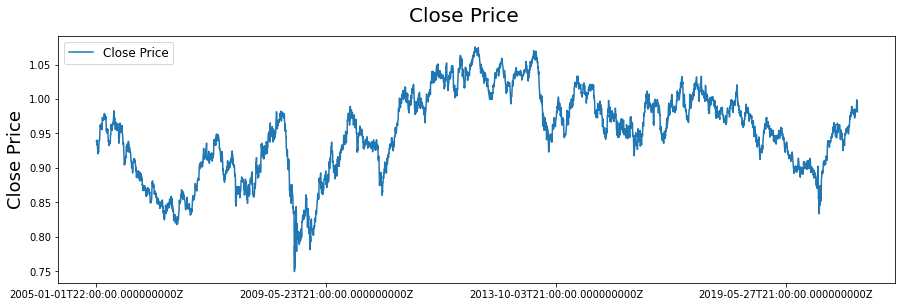

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Close Price", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['close'], label='Close Price')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['datetime'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

In [ ]:
morning_star = ta.CDLMORNINGSTAR(df['open'], df['high'], df['low'], df['close'])
engulfing = ta.CDLENGULFING(df['open'], df['high'], df['low'], df['close'])

df['Morning Star'] = morning_star
df['Engulfing'] = engulfing

engulfing_days = df[df['Engulfing'] != 0]


In [ ]:
types=['SMA','EMA','WMA','DEMA','TEMA',
'TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
df_ma.tail()


,close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,T3
4843,0.99874,0.988994,0.990923,0.991511,0.995249,0.997073,0.988000,0.991120,0.984801,0.988305
4844,0.99598,0.991364,0.992609,0.993839,0.996616,0.997620,0.991799,0.992218,0.990391,0.990984
4845,0.99706,0.993912,0.994092,0.995738,0.997753,0.998192,0.995097,0.993355,0.993725,0.993433
4846,0.99224,0.995374,0.993475,0.995181,0.995504,0.994708,0.996070,0.993280,0.992983,0.994831
4847,0.98147,0.993098,0.989473,0.990546,0.988158,0.985398,0.994203,0.991953,0.992407,0.994023


In [ ]:
# Bollinger Band
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()

,close,H_line,M_line,L_line
4843,0.99874,0.994269,0.982419,0.970570
4844,0.99598,0.996295,0.983050,0.969806
4845,0.99706,0.998389,0.983859,0.969330
4846,0.99224,0.999176,0.984202,0.969228
4847,0.98147,0.999068,0.984448,0.969829


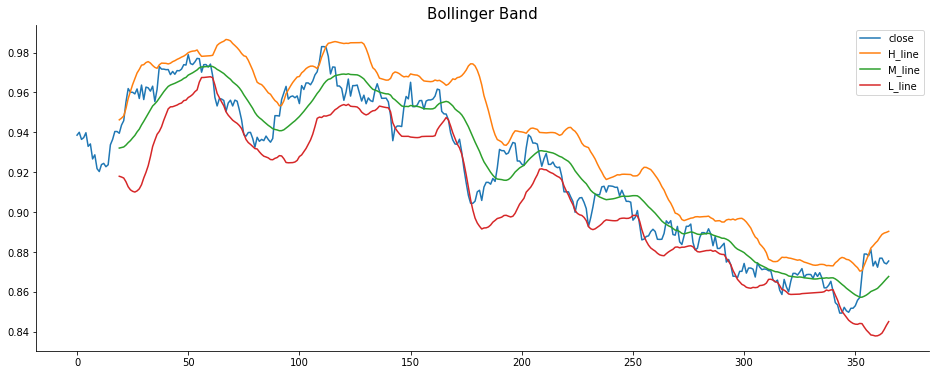

In [ ]:
df1.loc[0:365].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('Bollinger Band',fontsize=15)
plt.xlabel('')
plt.show()

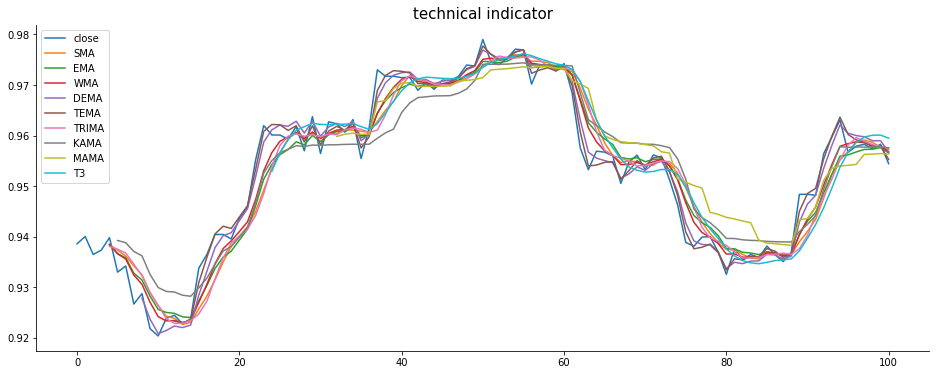

In [ ]:
df_ma.loc[0:100].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('technical indicator',fontsize=15)
plt.xlabel('')
plt.show()

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDL

In [ ]:
dataset_train = pd.read_csv('AUD_CAD_D.csv') 
train_size=3000
# training_set = dataset_train.iloc[0:train_size, 1:2].values
training_set = dataset_train.iloc[0:train_size, 1:2].values
testing_set = dataset_train.iloc[train_size:, 1:2].values
print(testing_set.shape,training_set.shape)

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)
print(training_set_scaled.shape,testing_set_scaled.shape)

(3000, 1) (1848, 1)


In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train)
print(X_train.shape,y_train.shape)
# print(X_train.shape[0],X_train.shape[1])
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(2940, 60) (2940,)


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
92/92 [==============================] - 15s 104ms/step - loss: 0.0567
Epoch 2/100
92/92 [==============================] - 10s 105ms/step - loss: 0.0070
Epoch 3/100
92/92 [==============================] - 10s 106ms/step - loss: 0.0061
Epoch 4/100
92/92 [==============================] - 10s 107ms/step - loss: 0.0050
Epoch 5/100
92/92 [==============================] - 10s 107ms/step - loss: 0.0048
Epoch 6/100
92/92 [==============================] - 10s 108ms/step - loss: 0.0045
Epoch 7/100
92/92 [==============================] - 10s 110ms/step - loss: 0.0044
Epoch 8/100
92/92 [==============================] - 10s 108ms/step - loss: 0.0040
Epoch 9/100
92/92 [==============================] - 10s 108ms/step - loss: 0.0041
Epoch 10/100
92/92 [==============================] - 10s 109ms/step - loss: 0.0038
Epoch 11/100
92/92 [==============================] - 10s 109ms/step - loss: 0.0037
Epoch 12/100
92/92 [==============================] - 10s 107ms/step - loss: 0.0036
E

In [ ]:
X_test = []
for i in range(60, len(testing_set_scaled)):
    X_test.append(testing_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape,X_train.shape)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(testing_set_scaled)
print(testing_set.shape,predicted_stock_price.shape,real_stock_price.shape)
# print(testing_set)
# print(predicted_stock_price)

(1788, 60, 1) (2940, 60, 1)
(1848, 1) (1788, 1) (1848, 1)


In [1]:
plt.plot(testing_set[60:159,], color = 'black', label = 'actual Stock Price')
plt.plot(predicted_stock_price[:100,], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

NameError: ignored

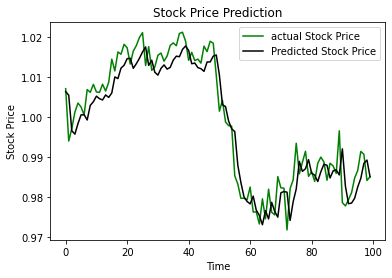

In [ ]:
plt.plot(testing_set[120:220,], color = 'green', label = 'actual Stock Price')
plt.plot(predicted_stock_price[60:160,], color = 'black', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


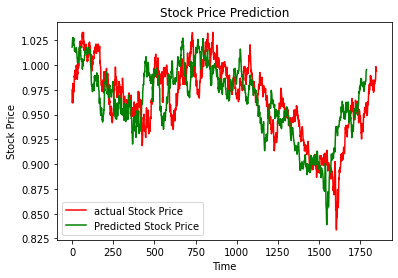

In [ ]:
plt.plot(testing_set, color = 'red', label = 'actual Stock Price')
# plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()